## Data Cleaning

Data is pulled from two sources:

1.   https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
2.   https://www.kaggle.com/datasets/mostafaabla/garbage-classification 

We use images for recyclable materials from the first link, and added trash and biological waste images from the second link to create more balanced classes. We have uploaded these folders to kaggle, and are available at this link:
https://www.kaggle.com/datasets/reesequillian/garbage-classification-recycle-trash


In [1]:
!pip install python_splitter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from random import *
import random
import python_splitter
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 


%matplotlib inline

In [4]:
# pull data from github: 

!git clone https://github.com/smithlauren785/DS4002CaseStudy

# now we can access all data files

Cloning into 'DS4002CaseStudy'...
remote: Enumerating objects: 4132, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 4132 (delta 1), reused 2 (delta 0), pack-reused 4126
Receiving objects: 100% (4132/4132), 49.90 MiB | 31.88 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [7]:
src_folder = "/content/DS4002CaseStudy/data"

In [8]:
# split into testing and training
# https://github.com/bharatadk/python_splitter

python_splitter.split_from_folder(src_folder, train = 0.7, test = 0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


Using the python_splitter, we now have a folder of testing and training images to use in the model, with a 70/30 split.  

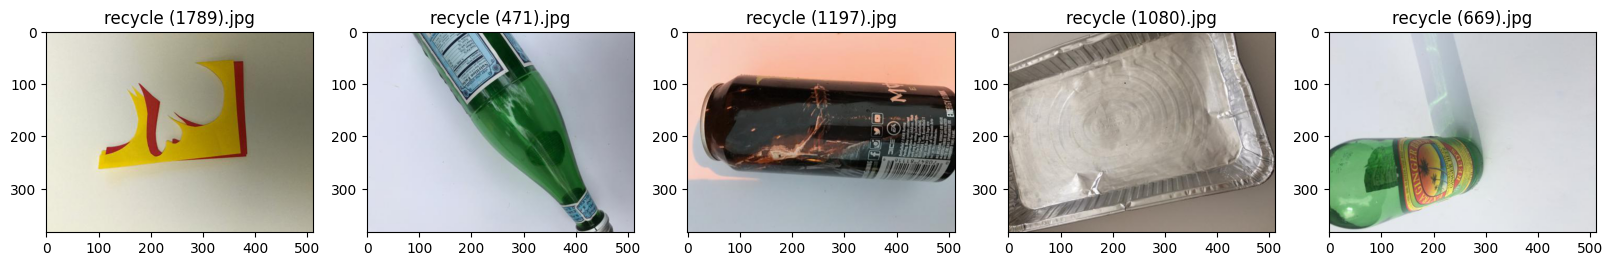

In [9]:
len(os.listdir("/content/Train_Test_Folder/test/recycle"))
len(os.listdir("/content/Train_Test_Folder/test/trash"))


len(os.listdir("/content/Train_Test_Folder/train/recycle"))
len(os.listdir("/content/Train_Test_Folder/train/trash"))


# printing random images from a folder to make sure they loaded correctly
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir("/content/Train_Test_Folder/train/recycle"))
    image_path= os.path.join("/content/Train_Test_Folder/train/recycle", file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Now that the images are loaded, we need to turn them into arrays and normalize them so that we can give them to the model. Pixels range in value from 0-255, which represent color codes, so we can divide each by 255.

We use a function written by Renu Khandelwal (https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6)


In [10]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder="/content/Train_Test_Folder/train"

In [11]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [12]:
# extract the image array and class name for train dataset
train_img_data, train_class_name = create_dataset(img_folder)

In [13]:
# extract the image array and class name for test dataset
test_img_folder="/content/Train_Test_Folder/test"
test_img_data, test_class_name = create_dataset(test_img_folder)

In [14]:
# dictionary for classes
train_class_dict={k: v for v, k in enumerate(np.unique(train_class_name))}
test_class_dict={k: v for v, k in enumerate(np.unique(test_class_name))}

In [15]:
train_target_val= [train_class_dict[train_class_name[i]] for i in range(len(train_class_name))]
test_target_val = [test_class_dict[test_class_name[i]] for i in range(len(test_class_name))]

In [16]:
train_img_data[0:1]
# first image in array format

[array([[[0.8156863 , 0.8156863 , 0.8156863 ],
         [0.8156863 , 0.8156863 , 0.8156863 ],
         [0.81960785, 0.81960785, 0.81960785],
         ...,
         [0.8901961 , 0.8901961 , 0.8901961 ],
         [0.8901961 , 0.8901961 , 0.8901961 ],
         [0.8901961 , 0.8901961 , 0.8901961 ]],
 
        [[0.8156863 , 0.8156863 , 0.8156863 ],
         [0.8156863 , 0.8156863 , 0.8156863 ],
         [0.81960785, 0.81960785, 0.81960785],
         ...,
         [0.8901961 , 0.8901961 , 0.8901961 ],
         [0.8901961 , 0.8901961 , 0.8901961 ],
         [0.8901961 , 0.8901961 , 0.8901961 ]],
 
        [[0.8156863 , 0.8156863 , 0.8156863 ],
         [0.81960785, 0.81960785, 0.81960785],
         [0.81960785, 0.81960785, 0.81960785],
         ...,
         [0.8901961 , 0.8901961 , 0.8901961 ],
         [0.8901961 , 0.8901961 , 0.8901961 ],
         [0.8901961 , 0.8901961 , 0.8901961 ]],
 
        ...,
 
        [[0.72156864, 0.48235294, 0.10588235],
         [0.6784314 , 0.44705883, 0.08235

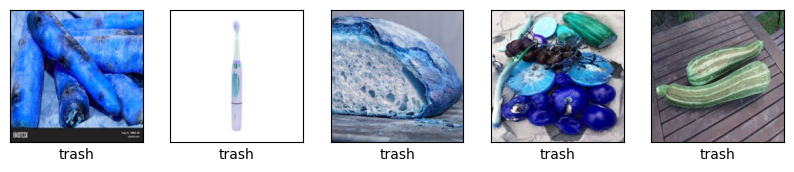

In [17]:
# making sure images look right still
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img_data[randint(1,1000)])
    plt.xlabel(train_class_name[i])
plt.show()